In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def julia_set(c, num_iter, N, X0):

    x_min, x_max, y_min, y_max = X0
    x, y = np.ogrid[x_min:x_max:N*1j, y_min:y_max:N*1j]
    z = x + 1j * y
    julia = np.zeros(z.shape)

    for n in range(num_iter):
        z = z**2 + c
        mask = np.abs(z) <= 2
        julia += mask

    return julia

In [3]:
c = -.2 -.65j
num_iter = 500
N = 500
X0 = np.array([-2, 2, -2, 2])
julia = julia_set(c, num_iter, N, X0)

<ipython-input-2-0b5ea2bb9788>:9: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-2-0b5ea2bb9788>:9: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
<ipython-input-2-0b5ea2bb9788>:10: RuntimeWarning: overflow encountered in absolute
  mask = np.abs(z) <= 2


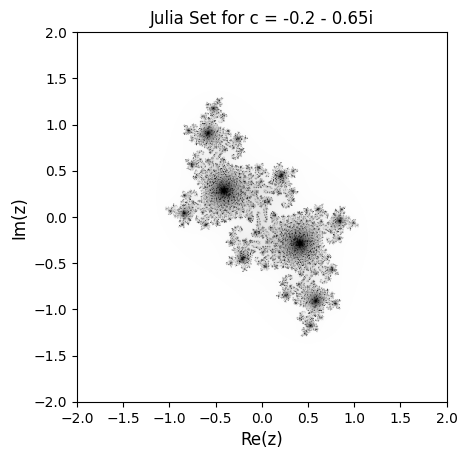

In [4]:
imshow(julia, extent=(X0[0], X0[1], X0[2], X0[3]), cmap='binary', norm=Normalize(vmin=0, vmax=num_iter))
xlabel('Re(z)', fontsize=12)
ylabel('Im(z)', fontsize=12)
title('Julia Set for c = -0.2 - 0.65i')
show()

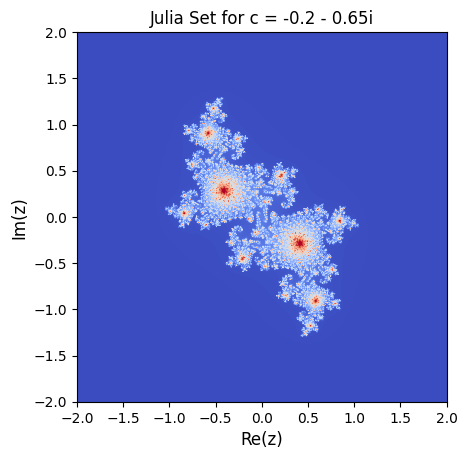

In [5]:
imshow(julia,
           extent=(X0[0], X0[1], X0[2], X0[3]),
           cmap='coolwarm',
           norm=Normalize(vmin=0, vmax=num_iter))
xlabel('Re(z)', fontsize=12)
ylabel('Im(z)', fontsize=12)
title('Julia Set for c = -0.2 - 0.65i')
show()

<ipython-input-2-0b5ea2bb9788>:9: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-2-0b5ea2bb9788>:9: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
<ipython-input-2-0b5ea2bb9788>:10: RuntimeWarning: overflow encountered in absolute
  mask = np.abs(z) <= 2


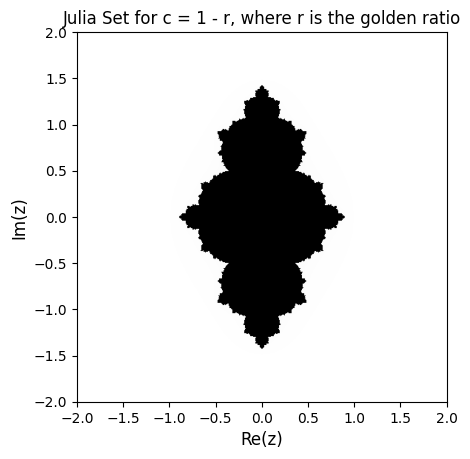

In [6]:
r = (1 + np.sqrt(5)) / 2 # Golden ratio
c = 1 - r
julia_3 = julia_set(c, num_iter, N, X0)

imshow(julia_3,
       extent=(X0[0], X0[1], X0[2], X0[3]),
       cmap='binary',
       norm=plt.Normalize(vmin=0, vmax=num_iter))
xlabel('Re(z)', fontsize=12)
ylabel('Im(z)', fontsize=12)
title('Julia Set for c = 1 - r, where r is the golden ratio')
show()

In [7]:
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

In [8]:
def julia_set_anim(c, num_iter, N, X0):

    x_min, x_max, y_min, y_max = X0
    x, y = np.ogrid[x_min:x_max:N*1j, y_min:y_max:N*1j]
    z = x + 1j * y
    julia = np.zeros(z.shape)

    for n in range(num_iter):
        z = z**2 + c
        mask = np.abs(z) <= 2
        julia += mask * (n + 1)

    julia[julia == 0] = num_iter + 1

    return julia

In [12]:
def animate(i):
    a = i * 0.1
    c = np.exp(1j * a)
    julia = julia_set_anim(c, num_iter, N, X0)
    im = imshow(julia,
                extent=(X0[0], X0[1], X0[2], X0[3]),
                cmap='coolwarm',
                norm=plt.Normalize(vmin=0, vmax=num_iter))
    return [im]

<ipython-input-8-b8f1442c63f3>:8: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-8-b8f1442c63f3>:8: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
<ipython-input-8-b8f1442c63f3>:9: RuntimeWarning: overflow encountered in absolute
  mask = np.abs(z) <= 2
<ipython-input-8-b8f1442c63f3>:8: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-8-b8f1442c63f3>:8: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
<ipython-input-8-b8f1442c63f3>:9: RuntimeWarning: overflow encountered in absolute
  mask = np.abs(z) <= 2


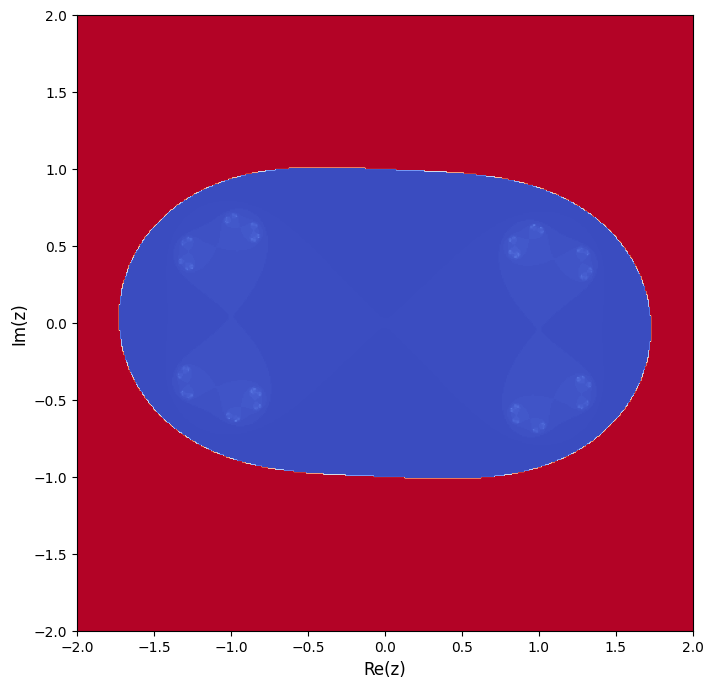

In [15]:
fig = plt.figure(figsize=(10, 8))
ani = FuncAnimation(fig, animate, frames=63, interval=100, blit=True)
xlabel('Re(z)', fontsize=12)
ylabel('Im(z)', fontsize=12)

display(HTML(ani.to_jshtml()))